In [68]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

In [101]:
def lin_sep_data_gen(dim, gamma, bias, R, n):
    points1=[]
    points2=[]
    w=np.random.rand(dim)
    w_hat=w/np.linalg.norm(w)
    while(True):
        x=np.random.uniform(-R+bias, R+bias, dim)
        if((np.dot(w_hat, x)-bias)>=gamma):
            points1.append([x, 1])
            if(len(points1)==int(n/2)):
                break
    while(True):
        x=np.random.uniform(-R+bias, R+bias, dim)
        if((np.dot(w_hat, x)-bias)<=(-gamma)):
            points2.append([x, -1])
            if(len(points2)==int(n/2)):
                break
    return points1, points2
def dataset_plotter(dim, points, bias):
    if(dim==1):
        if(bias==0):
            for point in points:
                if(point[1]==+1):
                    plt.scatter(point[0], 0, color='red', marker='.')
                elif(point[1]==-1):
                    plt.scatter(point[0], 0, color='blue', marker='.')
        elif(bias!=0):
            for point in points:
                if(point[1]==+1):
                    plt.scatter(point[0][0], 0, color='red', marker='.')
                elif(point[1]==-1):
                    plt.scatter(point[0][0], 0, color='blue', marker='.')
    elif(dim==2):
        for point in points:
            if(point[1]==+1):
                plt.scatter(point[0][0], point[0][1], color='red', marker='.')
            elif(point[1]==-1):
                plt.scatter(point[0][0], point[0][1], color='blue', marker='.')
def perceptron(dim, points, w, bias):
    w1=np.array([])
    itr=0
    if(bias==0):
        while(not np.array_equal(w1, w)):
            w1=np.copy(w)
            dataset_plotter(dim, points, bias)
            if(dim==1):
#                 plt.plot([w[0], -w[0]], [0, 0], color='cyan')
                plt.plot([0, 0], [-w[0], w[0]], color='black')
            elif(dim==2):
                plt.plot([-w[1], w[1]], [w[0], -w[0]], color='black')
            plt.show()
            print('w=', w)
            for point in points:
                x=np.array(point[0])
                if((point[1]*np.dot(w, x))<=0):
                    w=w+(point[1]*x)
                    itr+=1
                    break
    elif(bias!=0):
        w=np.append(w, bias)
        while(not np.array_equal(w1, w)):
            w1=np.copy(w)
            dataset_plotter(dim, points, bias)
            if(dim==1):
                plt.plot([w[0], -w[0]], [0, 0], color='cyan')
                plt.plot([bias, bias], [-w[0], w[0]], color='black')
            plt.show()
            print('w=', w)
            for point in points:
                temp=np.array(point[0])
                temp=np.append(temp, 1)
                if((point[1]*np.dot(w, temp))<=0):
                    w=w+(point[1]*temp)
                    itr+=1
                    break
    print('itr=', itr)
    return w
        

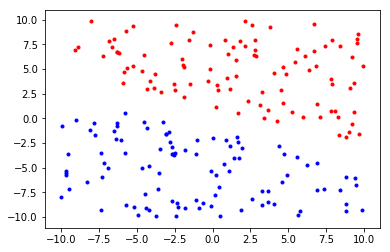

w= [0. 0.]


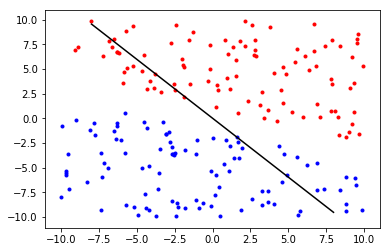

w= [9.54482092 7.99993391]


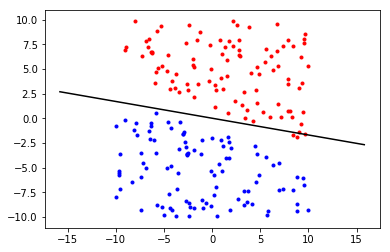

w= [ 2.68498102 15.79477073]


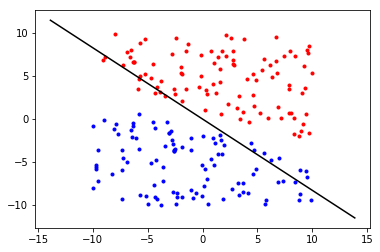

w= [11.49829122 13.86654931]


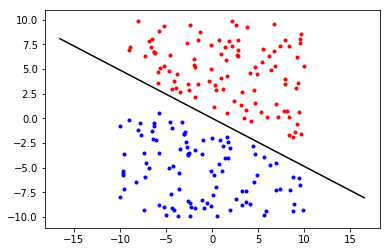

w= [ 8.06818145 16.51821376]
itr= 4


In [102]:
n=200
dim=2
gamma=1
bias=0
R=10
points1, points2=lin_sep_data_gen(dim, gamma, bias, R, n)
points=[*points1, *points2]
w_initial=np.zeros(dim)
w_final=perceptron(dim, points, w_initial, bias)